# Statistical comparison global gridded climate datasets and their influence on LPJ-GUESS model outputs
Geocomputation course VT2021, Individual project

<b>Alexandra Pongracz </b> 

alexandra.pongracz@nateko.lu.se

## Background & Introduction
Gridded climate data products are imperative resources for global environmental research. These continuous datasets are prduced by compiling and interpolating observational datasets, reanalysis products or a hybrid product of these two approaches. Such climate datasets enable to investigate long term processes, causality and atmosphere-biosphere interactions on a global scale. They are widely used as forcing in models to investigate ecosystem response to changing climatic conditions (New et al. 2000). Nowadays there are several gridded climatic datasets available - for instance CEDA Archive, NOAA - and updated on a regular basis. 

Meteorological input variables have a large influence of simulated biogeochemical and hydrological  model outputs, such as ecosystem productivity or the computed carbon balance (McGuire et al 2001, Wu et al. 2018).  The choice of forcing climate dataset is a large source of uncertainty in ecosystem modelling (McGuire et al. 2018). Model intercomparison projects – such as the Coupled Model Intercomparison Project (CMIP) -,therefore, assign a common simulation protocol to avoid output bias due to the differences in the climatic inputs (Taylor 2012, CMIP5). Finding of state-of-the-art global modelling studies are presented in the IPCC (Intergovermental Panel on Climate Change) climate assessment reports and provide the basis for discussion on climate change adoptation and mitigation procedures. 
The chosen climate forcing does not only effect scientific research but has a direct impact on decision making. Assessing the the potential bias and incertainty in model outputs due to different climatic forcing is critical to evaluate.

These issues concern my own PhD project where I investigate climate change impact on the Arctic carbon cycle using a dynamic vegetation model (LPJ-GUESS). Future climate change scenarios forecast largest changes in temperature and precipitation at northern high latitudes - the region that is already undergoing unprecedented environmental changes (Box et al.2019). It is important to get a more comprehensive understanding on the impact of changing environmental conditions on biogeochemical and hydrological cycles. As these cycles are strongly dependent on the climatic forcing, 
the choice of model climatic forcing needs to be carefully chosen. A number of studies evaluated the fit between observations and gridded climate datasets with the conclusion that depending on region and time period, there is a substantial bias between gridded climate data and observations (Mehran et al. 2014, Li et al. 2013). This bias may propagate to model uncertainty. Wu et al. (2018) suggested that the large climate bias induced uncertainties in modelled carbon balance estimated need to be further investigated and minimised. Similarily, the study of Ahlström et al. (2013) emphesised that the modelled carbon balance strongly depend on climatic forcing variables. It is useful to analyse the impact of different climatic forcing on the model simulations to (1) evaluate the outputs accordingly and  to (2) keep the climate forcing derived differences in mind when comparing to modelling studies using different simulation set-ups. 

One of the most widely used global gridded climate datasets is the CRUNCEP (v7) product, that is combined from CRU TS 3.2 observational and NCEP reanalysis products (Viovy et al. 2016).   CRUJRA (v.2.1) is a recently developed dataset, that is planned to replace CRUNCEP in the future (Harris et al. 2019). CRUJRA is constructed from the Japanese Reanalysis data (JRA) and CRU TS 4.03 datasets, and has a global coverage just as CRUNCEP. Currenly, LPJ-GUESS offline historical simulations are forced by CRUNCEP data, with plans to migrate to the CRUJRA dataset in the near future. Understanfing the differences between these two dataset would be valuable prior to this update.

In this project, the focus is on investigating the spatio-temporal differences on current and future model climate forcing datasets and their impact on modelled variables. This project is purely geocomputational, as my aim is to analyse two well known gridded climate datasets and their impact on LPJ-GUESS model outputs. Details on the two studied datasets are shown in Table 1.

Table 1. Description of studied global gridded climate datasets.

 - | CRUNCEP v.7  | CRU JRA 2.1 
--|:---------:|:-----------:
data coverage |1901-2015 | 1901-2019   
spatial resolution | 0.5° x 0.5°| 0.5° x 0.5°
temporal resolution | daily  | daily
reference| Viovy et al. 2016 | Harris et al. 2019
available variables| air T, precipitation, humidity,| incoming solar radiation, surface winds, pressure

The objectives of this project are:
<ol>
<li>to compute and compare the amplitude and interannual variation in key variables for the two studied datasets</li>
<li>to identify areas with largest differences (hotspots with largest deviations)</li>
<li>to evaluate the impact on selected modelled variables (snow depth, near surface soil T, ecosystem productivity)</li>
</ol>



## Methods

#### Data aquisition
Both datasets are available to the public free of charge upon registration on the data repository sites of CEDA (CRUJRA 2.1.CEDA https://catalogue.ceda.ac.uk/uuid/7f785c0e80aa4df2b39d068ce7351bbb) and UCAR (CRUNCEP v.7.https://rda.ucar.edu/datasets/ds314.3/). The downloaded data was stored on an external harddrive.

#### Data exploration 
As the CRUJRA data already had a daily temporal resolution I did not have conduct pre-processing or data alignment. CRUNCEP data was dowloaded with a 6-hourly temporal resolution. Prior to the data analysis the datafiles were combined and aggregated to a single time series dataset. Due to time limitation, I selected a confined study region and focused on surface temperature variable between the 1970-2019 period. Data was clipped to the selected spatial and temporal extent to facilitate the further processing and analysis steps (using Python xarray tools). The study area was delinated by a bounding box with coordinates lat 4.0,54.0, lon. 33.0,72.0.

#### Data processing 
Climate data was processed using the Climate data operator (CDO) software. CDO is a well known data processing toolset, custimised to climate data processing and analysis (Schulzweida 2019). Firstly, I used CDO tools to have an overview of the data specifics (ncdump, ncview). I computed a set of descriptive statistical indices to compare the datasets.
<ol>
<li>Descriptive statistics, monthly, global/regional scale </li>
    relative frequency distribution (max, min, mean, median, percentile)
<li>Spatial patterns, visualising areas with largest differences by the difference in mean daily temperature</li>
<li>Temporal patterns, time-series analysis</li>
DTW: currently, the most popular method for elastic matching of sequences is DTW, which minimizes the Euclidean distance of corresponding points. 
</ol>

In [ ]:
############################################
# # Downloading CRUNCEP data from UCAR
############################################
import sys, os
import requests

def check_file_status(filepath, filesize):
    sys.stdout.write('\r')
    sys.stdout.flush()
    size = int(os.stat(filepath).st_size)
    percent_complete = (size/filesize)*100
    sys.stdout.write('%.3f %s' % (percent_complete, '% Completed'))
    sys.stdout.flush()

# Try to get password
if len(sys.argv) < 2 and not 'RDAPSWD' in os.environ:
    try:
        import getpass
        input = getpass.getpass
    except:
        try:
            input = raw_input
        except:
            pass
    pswd = input('Password: ')
else:
    try:
        pswd = sys.argv[1]
    except:
        pswd = os.environ['RDAPSWD']

url = 'https://rda.ucar.edu/cgi-bin/login'
values = {'email' : 'alexandra.pongracz@nateko.lu.se', 'passwd' : pswd, 'action' : 'login'}
# Authenticate
ret = requests.post(url,data=values)
if ret.status_code != 200:
    print('Bad Authentication')
    print(ret.text)
    exit(1)
dspath = 'https://rda.ucar.edu/data/ds314.3/'
filelist = [
'2010_2016/clmforc.cruncep.V7.c2016.0.5d.TPQWL.*.nc']
for file in filelist:
    filename=dspath+file
    file_base = os.path.basename(file)
    print('Downloading',file_base)
    req = requests.get(filename, cookies = ret.cookies, allow_redirects=True, stream=True)
    filesize = int(req.headers['Content-length'])
    with open(file_base, 'wb') as outfile:
        chunk_size=1048576
        for chunk in req.iter_content(chunk_size=chunk_size):
            outfile.write(chunk)
            if chunk_size < filesize:
                check_file_status(file_base, filesize)
    check_file_status(file_base, filesize)
    print()


In [ ]:
############################################
# Function to extract study area and period
############################################
def raw_to_extent(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".nc"):
            data_path = os.path.join(directory, filename)
            raw = xr.open_dataset(data_path)
            area_clipped = raw.sel(lon=slice(4, 33), lat=slice(54, 72))
            clipped = area_clipped.sel(time=slice("1970-01-01", "2019-12-31"))

            new_filename = '/media/VM_shared/clim_out/extent/' + str(filename) + '_ext.nc'
            print ('saving to ', new_filename)
            clipped.to_netcdf(path=new_filename)

# Clipping raw data files to extent
directory = r'/media/data/CRU_JRA2_1'
raw_to_extent(directory)


In [ ]:
ds = xarray.open_mfdataset('E:/VM_shared/NCEP/re_prc/clmforc.*.nc',combine = 'by_coords', concat_dim="time")
daily = ds.resample(time="24H").sum()
daily.PRECTmms.to_netcdf('E:/VM_shared/NCEP/prec_1970_2016sum.nc')

In [6]:
# Import nessesary Python packages
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from dtw import *
import xskillscore as xs
#import help_func_AP as fun
import warnings
warnings.filterwarnings('ignore')

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [7]:
################################################
## Calculating seasonal time series
################################################
def calc_season(indata, varname, dataset):
    time = "time.season"       
    out = indata.groupby(time)
    DJF = out["DJF"].to_series().to_frame().rename(columns={varname: 'data'})
    DJF["seas"] = "DJF"
    MAM = out["MAM"].to_series().to_frame().rename(columns={varname: 'data'})
    MAM["seas"] = "MAM"
    JJA = out["JJA"].to_series().to_frame().rename(columns={varname: 'data'})
    JJA["seas"] = "JJA"
    SON = out["SON"].to_series().to_frame().rename(columns={varname: 'data'})
    SON["seas"] = "SON"
    x = pd.concat([DJF, MAM, JJA, SON])
    x["dataset"] = dataset
    return x

In [7]:
# Computing statistical properties from raw netcdf data using cdo

# Temperature----------------------------------------------------
# Convert from K to Celsius and change attributes
!cdo -addc,-273.15, -setattribute,tmp@units="degC" /media/sf_VM_shared/clim_out/extent/crujra.v2.1.5d.tmp.1901-2019.365d.noc.daymean.chunked_rew.nc_ext.nc  /media/sf_VM_shared/CRUJRA/tmp_1970_2016_C.nc
!cdo -addc,-273.15, -setattribute,TBOT@units="degC" /media/sf_VM_shared/NCEP/tmp_1970_2016.nc /media/sf_VM_shared/NCEP/tmp_1970_2016_C.nc

cdo addc: Started child process "setattribute,tmp@units=degC /media/sf_VM_shared/clim_out/extent/crujra.v2.1.5d.tmp.1901-2019.365d.noc.daymean.chunked_rew.nc_ext.nc (pipe1.1)".
cdo(2) setattribute: Processed 35819640 values from 1 variable over 17155 timesteps [11.54s]
cdo addc: Processed 35819640 values from 1 variable over 17155 timesteps [11.54s 607MB]
cdo addc: Started child process "setattribute,TBOT@units=degC /media/sf_VM_shared/NCEP/tmp_1970_2016.nc (pipe1.1)".
^C


In [26]:
raw2 = xr.open_dataset("/media/sf_VM_shared/NCEP/tmp_1970_2016_C.nc")
area_clipped = raw2.sel(lon=slice(4, 33), lat=slice(54, 72))
new_filename = '/media/sf_VM_shared/NCEP/tmp_1970_2016_C_ext.nc'
print ('saving to ', new_filename)
area_clipped.to_netcdf(path=new_filename)

saving to  /media/sf_VM_shared/NCEP/tmp_1970_2016_C_ext.nc


In [7]:
# Calculate daily annual cycle
!cdo -ydaymean /media/sf_VM_shared/CRUJRA/tmp_1970_2016_C.nc /media/sf_VM_shared/CRUJRA/tmp_ydaymean365.nc

cdo ydaymean: Processed 4446576000 values from 1 variable over 17155 timesteps [29.43s 1517MB]
cdo ydaymean: Processed 35819640 values from 1 variable over 17155 timesteps [7.14s 294MB]


In [27]:
!cdo -ydaymean /media/sf_VM_shared/NCEP/tmp_1970_2016_C_ext.nc /media/sf_VM_shared/NCEP/tmp_ydaymean365.nc

cdo ydaymean: Processed 35819640 values from 1 variable over 17155 timesteps [3.38s 495MB]


In [100]:
!cdo -monmean /media/sf_VM_shared/NCEP/prec_cut.nc /media/sf_VM_shared/clim_out/stat/tmpCCRUJRA_ydays.nc

cdo monmean: Processed 35819640 values from 1 variable over 17155 timesteps [1.78s 1594MB]


In [104]:
!cdo -ydayvar /media/sf_VM_shared/clim_out/ncepT_1970_2016_scandi_C.nc /media/sf_VM_shared/NCEP/tmpNCEP_ydayvar365.nc

cdo ydayvar: Processed 35819640 values from 1 variable over 17155 timesteps [3.80s 1594MB]


#### CRU NCEP ---------------------------------------------------------

In [ ]:
# test a global stat
!cdo -daymean /media/sf_VM_shared/clim_out/sliced_raw/crujra.v2.1.5d.tmp.1901-2019.365d.noc.daymean.chunked_rew.nc /media/sf_VM_shared/clim_out/stat/tmp_global_daymean.nc

In [101]:
!cdo -ydayvar /media/sf_VM_shared/NCEP/tmp_cut.nc /media/sf_VM_shared/NCEP/tmpNCEP_ydayvar.nc

cdo ydayvar: Processed 35819640 values from 1 variable over 17155 timesteps [1.51s 1594MB]


pre_yvar = xr.open_dataset("/media/sf_VM_shared/clim_out/stat/pre_daymean.nc")## Data processing

### Time series analysis (DTW)
The Python dwt function allows the selection of different arbitary windows, which define the shape of the matching window and the diagonal alignment of the least cost path. In this project I test the Sakoe-Chiba band and Itakura parallelogram windows. Slope contraints can be set by the *step patterns* parameter. This parameter controls the number of time series elements (Y) to be matched with X, which influences the curve of the warping path. In this project I tested  (Toni Giorgino, 2009).

### Basic model evaluation
To assess the impact of changing the climatic input in an ecosystem model, I conducted a set of simulations with the LPJ-GUESS DGVM v.4. Due to time limitations, I selected a number of sites randomly within the study region, and focused on the simulated snow depth, near surface soil temperature and GPP outputs.


## Results & Discussion

The computed statistical characteristics of the two datasets are shown in Table 2. There are marginal differences in mean global temperature, with the CRUJRA dataset having higher variance. There are large differences in precipitation, with CRUJRA dataset daily precipitation being significantly lower than the CRUNCEP values.

*Table 2. Basic statistical indices of daily near surface temperature and daily precipitation variables for the two studied datasets.*
 - | CRUJRA  | CRUNCEP
--|:---------:|:-----------:
T min (°C) |-27.38 | -19.43   
T max (°C) | 21.39 | 17.02
T mean (°C)| 3.27  | 3.39
T var (°C) | 74.65 | 51.83
Prec min (mm) |0.0 | 0.0  
Prec max (mm) | 10.1| 39.06
Prec mean (mm) | 2.1  | 8.64
Prec var (mm) |  1.74 | 20.62

pip install netCDF4pip install netCDF4#### Examining data distribution and seasonal patterns
When reviewing climate data we are not solely interested in the descriptive statistics, such as mean an variance of datasets, but the distribution of datapoints is extremely important to be able to capture rare and extreme conditions as well. To visualise the distribution, temperature and precipitation was plotted using violin plots.

The violin plots (Fig X and Y) show the comparison of mean daily temperature data over the 1970-2016 period for both climate datasets. The violin plot presents the mean and quantiles of data and the kernel density estimation of data distribution. Fig X shows a similar mean annual near surface temperature distibution for the two datasets, however, the CRU JRA dataset contains more values outside of the interquartile range.

In [8]:
jra_mon = xr.open_dataset("/media/sf_VM_shared/CRUJRA/tmp_1970_2016_C.nc", engine = "netcdf4")
x = jra_mon.tmp.to_dataframe()
xx = jra_mon.mean(["lat","lon"])
cru_time = xx.tmp

In [9]:
cru_time_df = cru_time.to_dataframe()
cru_time_df["dataset"] = "CRUJRA"
cru_time_df = cru_time_df.rename(columns={'tmp': 'data'})

In [10]:
# NCEP timeseries
ncep_mon = xr.open_dataset("/media/sf_VM_shared/NCEP/tmp_1970_2016_C_ext.nc")
x = ncep_mon.TBOT.to_dataframe()
xx = ncep_mon.mean(["lat","lon"])
ncep_time = xx.TBOT

In [11]:
ncep_time_df = ncep_time.to_dataframe()
ncep_time_df["dataset"] = "CRUNCEP"
ncep_time_df = ncep_time_df.rename(columns={'TBOT': 'data'})

In [12]:
T_viol = pd.concat([ncep_time_df,cru_time_df])

Text(0.5, 0, 'Dataset')

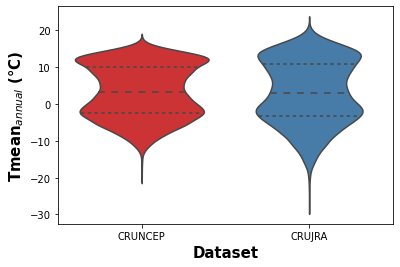

In [13]:
fig = plt.figure()
h = sns.violinplot(x="dataset", y="data", data=T_viol,palette = "Set1",inner="quartile")
h.set_ylabel('Tmean$_{annual}$ (°C)', fontweight='bold', fontsize = 15)
h.set_xlabel('Dataset', fontweight='bold', fontsize = 15)

*Figure 1. Violin plot showing the kernel density distribution of daily near surface temeprature for the CRUJRA and CRUNEP datasets.*

### Seasonal differences

In [17]:
# Mean difference between T
da_a = xr.open_dataset("/media/sf_VM_shared/NCEP/tmp_ydaymean365.nc")
da_b = xr.open_dataset("/media/sf_VM_shared/CRUJRA/tmp_ydaymean365.nc")
x = da_a.mean(dim = "time")
y = da_b.mean(dim = "time")
# absolute difference between mean annual T (NCEP-crujra)
diff = x.TBOT - y.tmp 

In [ ]:
cmap = "YlOrRd"
norm = colors.TwoSlopeNorm(vmin=-0.3, vcenter=0.0, vmax=0.3) 
ax = plt.axes(projection=ccrs.Robinson())

plt.contourf(diff.lon,diff.lat,diff,cmap=cmap,norm = norm,transform=ccrs.PlateCarree())

ax.coastlines()

fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap),
                 ax=ax, orientation='vertical', label='T diff. (°C)', fraction = 0.033)
#plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap),fraction=0.046, pad=0.04, pad=0.04)
ax.set_title("$T_{mean}$ difference (CRUNCEP-CRUJRA)")
plt.savefig("E:/VM_shared/spatial_diff.png", dpi = 300)

plt.show()

In [14]:
viol_mon_ncep = calc_season(ncep_time, "TBOT", "CRUNCEP")
viol_mon_jra = calc_season(cru_time, "tmp", "CRUJRA")
viol_mon = pd.concat([viol_mon_ncep, viol_mon_jra])

Fig. 2. Violon plot showing the seasonal distribution of surface temperature for the CRUNCEP and CRUJRA datasets.


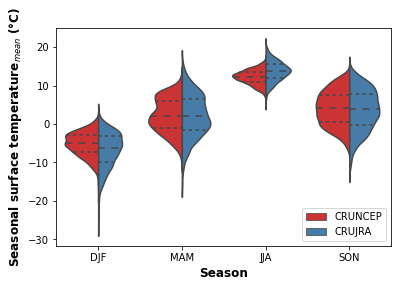

In [15]:
h = sns.violinplot(x="seas", y="data",hue = "dataset", data=viol_mon,
                   palette = "Set1",inner="quartile",split = True)
h.set_ylabel('Seasonal surface temperature$_{mean}$ (°C)', fontweight='bold', fontsize = 12)
h.set_xlabel('Season', fontweight='bold', fontsize = 12)
plt.legend(loc='lower right')
plt.savefig("/media/sf_VM_shared/seasT_viol.png", dpi = 300)
print("Fig. 2. Violon plot showing the seasonal distribution of surface temperature for the CRUNCEP and CRUJRA datasets.")


In [16]:
# Corr
da_a = xr.open_dataset("/media/sf_VM_shared/NCEP/tmp_ydaymean365.nc")
da_b = xr.open_dataset("/media/sf_VM_shared/CRUJRA/tmp_ydaymean365.nc")
x = da_a.mean(dim = "time")
y = da_b.mean(dim = "time")
# absolute difference between mean annual T (NCEP-crujra)
diff = x.TBOT - y.tmp 

Precipitation (only for testing purposses)

In [17]:
prec_raw_crujra = xr.open_dataset("/media/sf_VM_shared/CRUJRA/prec_cut.nc")
prec_jra = prec_raw_crujra.pre
prec_jra_time = prec_jra.mean(["lat","lon"])

In [18]:
prec_raw_ncep = xr.open_dataset("/media/sf_VM_shared/NCEP/prec_cut.nc")
prec_ncep = prec_raw_ncep.PRECTmms * 60*60
prec_ncep_time = prec_ncep.mean(["lat","lon"])

In [19]:
violP_mon_ncep = calc_season(prec_ncep_time, "PRECTmms", "CRUNCEP")
violP_mon_jra = calc_season(prec_jra_time, "pre", "CRUJRA") 
violP_mon = pd.concat([violP_mon_ncep, violP_mon_jra])

Fig. 3. Violon plot showing the seasonal distribution of precipitation for the CRUNCEP and CRUJRA datasets.


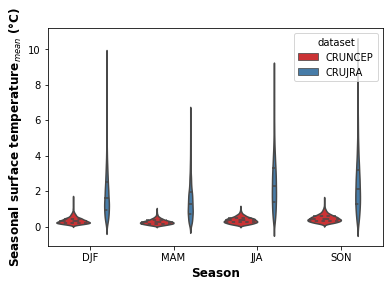

In [20]:
h = sns.violinplot(x="seas", y="data",hue = "dataset", data=violP_mon,
                   palette = "Set1",inner="quartile",split = False, legend_out=False)
h.set_ylabel('Seasonal surface temperature$_{mean}$ (°C)', fontweight='bold', fontsize = 12)
h.set_xlabel('Season', fontweight='bold', fontsize = 12)
print("Fig. 3. Violon plot showing the seasonal distribution of precipitation for the CRUNCEP and CRUJRA datasets.")


### Dynamic Time Warping (DTW)

In [21]:
# assign arrays monthly
Tcrujra = xr.open_dataset("/media/sf_VM_shared/CRUJRA/tmp_1970_2016_C.nc")
x = Tcrujra.resample(time="1MS").mean(dim="time")
xx = Tcrujra.groupby("time.month").mean("time")
TCRU = xx.mean(["lat","lon"])
TCRU = TCRU.tmp.values

In [22]:
T_NCEP= xr.open_dataset("/media/sf_VM_shared/NCEP/tmp_1970_2016_C_ext.nc")
xx = T_NCEP.groupby("time.month").mean("time")
TNCEP = xx.mean(["lat","lon"]).TBOT.values

In [23]:
alignment1 = dtw(TCRU, TNCEP, keep_internals=True,window_type="sakoechiba",window_args={'window_size':10},
                step_pattern = asymmetric)
print("Sakoe-Chiba, Normalised distance",alignment1.normalizedDistance)

Sakoe-Chiba, Normalised distance 0.8617017467816671


In [24]:
alignment2 = dtw(TCRU, TNCEP, keep_internals=True,window_type="sakoechiba",window_args={'window_size':10},
                step_pattern=symmetric2)
print("Sakoe-Chiba, Normalised distance",alignment2.normalizedDistance)

Sakoe-Chiba, Normalised distance 0.8859652280807495


In [25]:
alignment3= dtw(TCRU, TNCEP, keep_internals=True,window_type="sakoechiba",step_pattern=symmetricP05,window_args={'window_size':10})
print("Sakoe-Chiba, Normalised distance",alignment3.normalizedDistance)

Sakoe-Chiba, Normalised distance 0.9817056854565939


In [26]:
alignment4 = dtw(TCRU, TNCEP, keep_internals=True,window_type="sakoechiba", 
                 step_pattern=rabinerJuangStepPattern(5, "c"),window_args={'window_size':10})
print("Sakoe-Chiba, Normalised distance",alignment4.normalizedDistance)

Sakoe-Chiba, Normalised distance 0.9948395689328512


Figure 4. DWT matrices with the contrsucted best alignment path shown by the blue line. Applied the Sakoe-Chiba window contraint and tested four different step patterns, asymmetric, symmetric patterns with different slopes and Rabiner-Juang set.


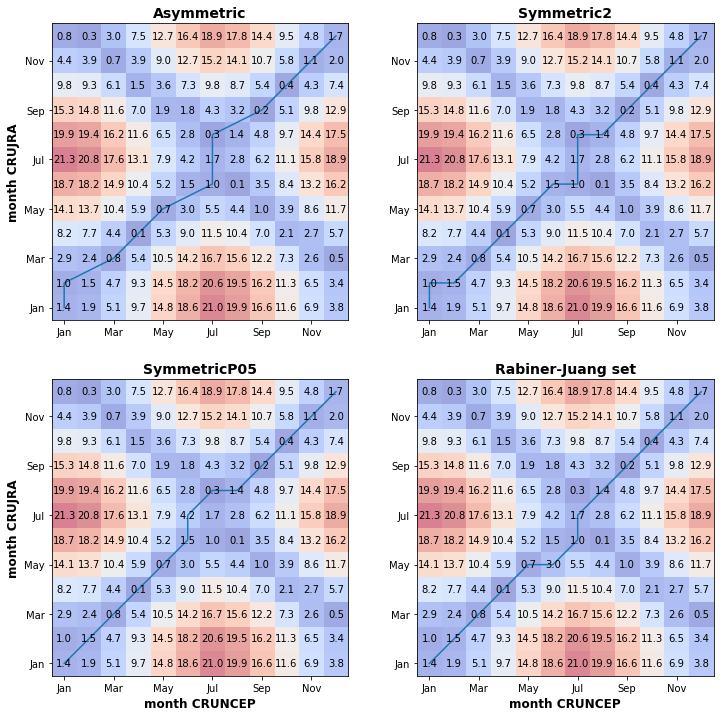

In [28]:
# Plot cost matrices
fig, axs = plt.subplots(2,2,figsize=(12,12))

axs[0, 0].imshow(alignment1.localCostMatrix,alpha=0.5,origin='lower', cmap = "coolwarm")
axs[0, 0].plot(alignment1.index2,alignment1.index1)
axs[0, 0].set_ylabel("month CRUJRA", fontweight='bold', fontsize = 12)
axs[0, 0].set_title("Asymmetric",fontweight='bold', fontsize = 14)
axs[0, 0].set_xticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[0, 0].set_xticks([0,2,4,6,8,10])
axs[0, 0].set_yticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[0, 0].set_yticks([0,2,4,6,8,10])
for (j,i),label in np.ndenumerate(np.round(alignment1.localCostMatrix,1)):
    axs[0, 0].text(i,j,label,ha='center',va='center')
    
axs[0, 1].imshow(alignment2.localCostMatrix,alpha=0.5,origin='lower', cmap = "coolwarm")
axs[0, 1].plot(alignment2.index2,alignment2.index1)

axs[0, 1].set_title("Symmetric2",fontweight='bold', fontsize = 14)
axs[0, 1].set_xticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[0, 1].set_xticks([0,2,4,6,8,10])
axs[0, 1].set_yticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[0, 1].set_yticks([0,2,4,6,8,10])
for (j,i),label in np.ndenumerate(np.round(alignment2.localCostMatrix,1)):
    axs[0, 1].text(i,j,label,ha='center',va='center')
    
axs[1, 0].imshow(alignment3.localCostMatrix,alpha=0.5,origin='lower', cmap = "coolwarm")
axs[1, 0].plot(alignment3.index2,alignment3.index1)
axs[1, 0].set_ylabel("month CRUJRA", fontweight='bold', fontsize = 12)
axs[1, 0].set_xlabel("month CRUNCEP", fontweight='bold', fontsize = 12)
axs[1, 0].set_title("SymmetricP05",fontweight='bold', fontsize = 14)
axs[1, 0].set_xticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[1, 0].set_xticks([0,2,4,6,8,10])
axs[1, 0].set_yticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[1, 0].set_yticks([0,2,4,6,8,10])
for (j,i),label in np.ndenumerate(np.round(alignment3.localCostMatrix,1)):
    axs[1, 0].text(i,j,label,ha='center',va='center')
    
axs[1, 1].imshow(alignment4.localCostMatrix,alpha=0.5,origin='lower', cmap = "coolwarm")
axs[1, 1].plot(alignment4.index2,alignment4.index1)
axs[1, 1].set_xlabel("month CRUNCEP", fontweight='bold', fontsize = 12)
axs[1, 1].set_title("Rabiner-Juang set",fontweight='bold', fontsize = 14)
axs[1, 1].set_xticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[1, 1].set_xticks([0,2,4,6,8,10])
axs[1, 1].set_yticklabels(["Jan","Mar","May","Jul","Sep","Nov"])
axs[1, 1].set_yticks([0,2,4,6,8,10])
for (j,i),label in np.ndenumerate(np.round(alignment4.localCostMatrix,1)):
    axs[1, 1].text(i,j,label,ha='center',va='center')
plt.savefig("/media/sf_VM_shared/dtw.png", dpi = 300)
print("Figure 4. DWT matrices with the contrsucted best alignment path shown by the blue line. Applied the Sakoe-Chiba window contraint and tested four different step patterns, asymmetric, symmetric patterns with different slopes and Rabiner-Juang set.")



Fig. X above shows the DWT matrix computed using four different step patterns for the least path computing. The figures show that the largest difference between the mean monthly temperature series is between June to August, with the largest deviation in July. There is also a considerable deviation in the winter months (Dec-Jan-Feb). The time-normalised cumulative distances are not significantly different (0.886 and 0.907 for the Sakoe-Chiba and Itakura windowing, respectively), which shows the dissimilarity between the two timeseries.

Discovering the difference between time series during winter months is important for modelling purposes at northern high latitudes. Air temperature forcing directly affects soil thermodynamics, which governs permafrost conditions. Soil temperature this influences carbon emission from soils, which carry a significant portion of the overall modern uncertainty.

## Impact on model outputs

### Near surface soil temperature
There is only a marginal difference (max 0.2 °C) in the calculated mean monthly near surface soil temperature. The largest differences are in the summer months, which align with the time series analysis from the DTW analysis. 

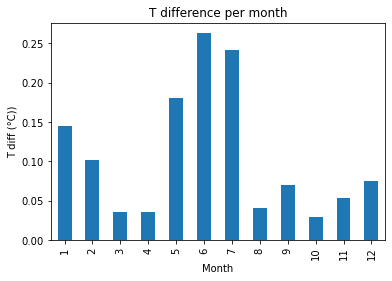

Fig x. Mean monthly difference in near surface soil T


In [34]:
# Read in model outputs
raw=pd.read_table('/media/sf_VM_shared/lpj_guess_runs/jra/msnowsoiltemp.out', sep= "\s+")

rawncep=pd.read_table('/media/sf_VM_shared/lpj_guess_runs/ncep/msnowsoiltemp.out', sep= "\s+")

test = rawncep.groupby(["Mth","Lat","Lon"]).mean()
del test['Year']
temp = test.groupby(["Mth"]).mean()

test2 = raw.groupby(["Mth","Lat","Lon"]).mean()
del test2['Year']
temp2 = test2.groupby(["Mth"]).mean()

diff = temp["10"] - temp2["10"]


fig = plt.figure()
diff.plot.bar()
plt.title("T difference per month")
plt.ylabel("T diff (°C))")
plt.xlabel("Month")
plt.show()
print("Fig 5. Mean monthly difference in near surface soil T")

### Snow depth
There is a marginal difference in snow depth, which can be product of precipitation and temperature differences in the two datasets. Snow cover is an important governing factor over soil thermodynamics, also influencing the rate of greenhouse gas emissions. The negative difference during the spring can be caused by slightly warmer conditions in the CRUJRA dataset.

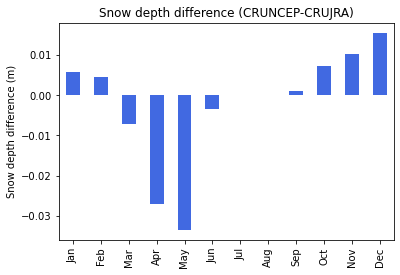

Fig. 6. Snow depth difference 


In [32]:
# Read in model outputs
raw = pd.read_table('/media/sf_VM_shared/lpj_guess_runs/jra/msnowdepth.out', sep= "\s+")
rawncep = pd.read_table('/media/sf_VM_shared/lpj_guess_runs/ncep/msnowdepth.out', sep= "\s+")

sd_ncep = rawncep.groupby(["Lat","Lon"]).mean()
sd_jra = raw.groupby(["Lat","Lon"]).mean()
diff_sd = sd_ncep - sd_jra
del diff_sd['Year']

fig = plt.figure()
diff_sd.mean().plot.bar(color = "royalblue")
plt.ylabel("Snow depth difference (m)")
plt.title("Snow depth difference (CRUNCEP-CRUJRA)")

plt.savefig("/media/sf_VM_shared/sd.png", dpi = 300)
plt.show()

print("Fig. 6. Snow depth difference ")

### Annual GPP

In [7]:
# agpp
raw = pd.read_table('/media/sf_VM_shared/lpj_guess_runs/jra/agpp.out',sep= "\s+")
rawncep = pd.read_table('/media/sf_VM_shared/lpj_guess_runs/ncep/agpp.out',sep= "\s+")

In [24]:
raw.Total.var()

0.23250266500092348

In [10]:
agpp_ncep = rawncep.groupby(["Lat","Lon"]).mean()
agpp_jra = raw.groupby(["Lat","Lon"]).mean()

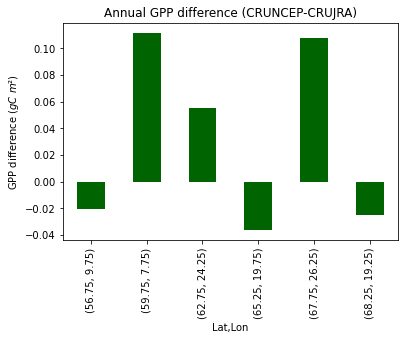

Fig. X. Average annual GPP difference/site (CRUNCEP-CRUJRA)


In [31]:
diff = agpp_ncep - agpp_jra
fig = plt.figure()
diff.Total.plot.bar(color = "#006400")
plt.ylabel("GPP difference ($g C \ m² $)")
plt.title("Annual GPP difference (CRUNCEP-CRUJRA)")
plt.savefig("/media/sf_VM_shared/agpp_site.png", dpi = 300)
plt.show()
print("Fig. 7. Average annual GPP difference/site (CRUNCEP-CRUJRA)")


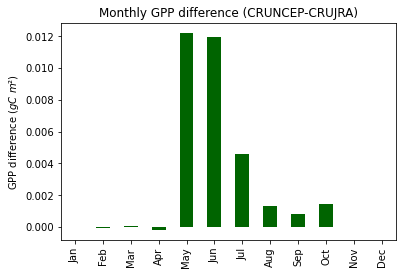

Fig. 8. Average monthly GPP difference (CRUNCEP-CRUJRA)


In [30]:
# Read in model outputs
raw=pd.read_table('/media/sf_VM_shared/lpj_guess_runs/jra/mgpp.out', sep= "\s+")

rawncep=pd.read_table('/media/sf_VM_shared/lpj_guess_runs/ncep/mgpp.out', sep= "\s+")

test = rawncep.groupby(["Lat","Lon"]).mean()
test2 = raw.groupby(["Lat","Lon"]).mean()
fig = plt.figure()
diff = test-test2
del diff['Year']
diff.mean().plot.bar(color = "#006400")
plt.ylabel("GPP difference ($g C \ m² $)")
plt.title("Monthly GPP difference (CRUNCEP-CRUJRA)")
plt.savefig("/media/sf_VM_shared/mgpp.png", dpi = 300)
plt.show()
print("Fig. 8. Average monthly GPP difference (CRUNCEP-CRUJRA)")


## Summary

In this short project, I found that the mean statistical indices for surface temperature are similar for the two compared datasets. The DTW time series analysis showed a deviation in winter and summer months. These differences have the ability to influence modelled biogeochemical variables. The model output analysis showed that there is a non-significant difference in soil temeprature, snow depth and GPP outputs. However to draw conclusions over a larger region, a more thorough analysis needed with global extent simulations.


An obvious shortcoming of this project is the limited spatial and temporal extent. Given more time, more climate variables could be compared on a global scale which would aid in deciding whether the CRUJRA dataset is a suitable to replace the current LPJ-GUESS climate forcing dataset. Additionally, the two climate datasets could be evaluated against observations to evaluate the regional and global fit of the gridded climate datasets.

## References

Ahlström A, Smith B, Lindström J, Rummukainen M and Uvo C B 2012 GCM characteristics explain the majority of uncertainty in projected 21st century terrestrial ecosystem carbon balance Biogeosciences 10 1517–28

Box, J. E., Colgan, W. T., Christensen, T., Schmidt, N. M., Lund, M., Parmentier, F.-J. W., Brown, R., Bhatt, U. S., Euskirchen, E. S.,5 Romanovsky, V. E., Walsh, J. E., Overland, J. E., Wang, M., Corell, R., Meier, W. N., Wouters, B., Mernild, S. H., Mård, J., Pawlak, J.,
and Olsen, M. S.: Key indicators of Arctic climate change: 1971–2017., Environmental Research Letters, 14, 2019. Bruhwiler, L., Parmentier, F.-J.W., Crill, P., Leonard, M., and Palmer, P. I.: The Arctic Carbon Cycle and Its Response to

McGuire, A. D., et al. (2001), Carbon balance of the terrestrial biosphere in the Twentieth Century: Analyses of CO2, climate and land use effects with four process-based ecosystem models, Global Biogeochem. Cycles, 15( 1), 183– 206, doi:10.1029/2000GB001298. 

Mehran A, Agha, Kouchak A and Phillips T J 2014 Evaluation of CMIP5 continental precipitation simulations relative to satellite-based gauge-adjusted observations J. Geophys. Res.: Atmos. 119 1695–707

New, M., Hulme, M., & Jones, P. (2000). Representing Twentieth-Century Space–Time Climate Variability. Part II: Development of 1901–96 Monthly Grids of Terrestrial Surface Climate, Journal of Climate, 13(13), 2217-2238. Retrieved Jun 3, 2021, from https://journals.ametsoc.org/view/journals/clim/13/13/1520-0442_2000_013_2217_rtcstc_2.0.co_2.xml
Li J L F, Waliser D E, Stephens G, Lee S, L’Ecuyer T, Kato S, Loeb N and Ma H-Y 2013 Characterizing and understanding radiation budget biases in CMIP3/CMIP5 GCMs, contemporary GCM, and reanalysis J. Geophys. Res.: Atmos. 118 8166–84

Harris, I.C. (2019): CRU JRA v2.0: A forcings dataset of gridded land surface blend of Climatic Research Unit (CRU) and Japanese reanalysis (JRA) data; Jan.1901 - Dec.2018.. Centre for Environmental Data Analysis, University of East Anglia Climatic Research Unit, date of citation. https://catalogue.ceda.ac.uk/uuid/7f785c0e80aa4df2b39d068ce7351bbb

Viovy, N. 2018. CRUNCEP Version 7 - Atmospheric Forcing Data for the Community Land Model. Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory. https://doi.org/10.5065/PZ8F-F017. Accessed 05 May 2021.

T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package. 2009. J. Stat. Soft., doi:10.18637/jss.v031.i07.
  
Schulzweida, Uwe. (2019). CDO User Guide (Version 1.9.8). http://doi.org/10.5281/zenodo.3539275

Wu Z, Boke-Olen N, Fensholt R, Ardö J,
Eklundh L, Lehsten V (2018) Effect of climate
dataset selection on simulations of terrestrial GPP:
Highest uncertainty for tropical regions. PLoS ONE
13(6): e0199383. https://doi.org/10.1371/journal.
pone.0199383